<a href="https://colab.research.google.com/github/Shivangi12974/Customer_Classified_Project/blob/main/STOCK_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as  np
import pandas as pd

In [2]:
np.random.seed(56)
Date = pd.date_range(start='2025-01-01',periods = 1000, freq = 'D')
open = np.round(np.random.uniform(100,500,1000),2)
High = open + np.round(np.random.uniform(1,11,1000),2)
Low = open - np.round(np.random.randint(1,51,1000),2)
Close = np.round((High + Low + open) / 3 + np.random.uniform(-10, 10, 1000), 2)
Adj_Close = Close + np.round(np.random.uniform(-5, 5, 1000), 2)
Volumn = np.random.randint(100000, 1000000, 1000)
df = pd.DataFrame({"Date:" :Date, "Open" : open, "High" :High, "Low" :Low,"Close":Close, "Adj Close":Adj_Close, "Volumn":Volumn})

csv_filename = "Stock_Price_Prediction.csv"
df.to_csv(csv_filename, index = False)
print(f"Dataset saved as '{csv_filename}'with {df.shape[0]} rows and {df.shape[1]} coumns.")

Dataset saved as 'Stock_Price_Prediction.csv'with 1000 rows and 7 coumns.


In [3]:
df = pd.read_csv("Stock_Price_Prediction.csv")
print(df.head())

        Date:    Open    High     Low   Close  Adj Close  Volumn
0  2025-01-01  493.68  501.80  446.68  487.43     484.39  726263
1  2025-01-02  233.36  236.97  205.36  234.25     230.81  609005
2  2025-01-03  369.48  378.90  319.48  362.08     361.33  378525
3  2025-01-04  178.56  184.21  136.56  174.20     172.82  872924
4  2025-01-05  241.78  251.15  229.78  232.93     230.08  325240


In [4]:
print("\nMissing values:\n", df.isnull().sum())
print("\n Dataset Summary:\n", df.describe())


Missing values:
 Date:        0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volumn       0
dtype: int64

 Dataset Summary:
               Open         High          Low       Close    Adj Close  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.000000   
mean    298.810470   304.925820   272.577470   292.10314   292.142110   
std     117.011175   117.255045   117.533628   117.26297   117.323856   
min     100.050000   106.250000    57.650000    87.83000    85.530000   
25%     195.172500   199.352500   170.000000   189.22250   189.732500   
50%     297.065000   303.115000   267.700000   290.41500   290.170000   
75%     401.502500   406.460000   375.862500   392.71250   394.080000   
max     499.990000   508.210000   492.170000   504.91000   507.070000   

              Volumn  
count    1000.000000  
mean   544355.799000  
std    261687.464882  
min    101621.000000  
25%    309515.750000  
50%    542366.500000  
75%    771741.000000  
ma

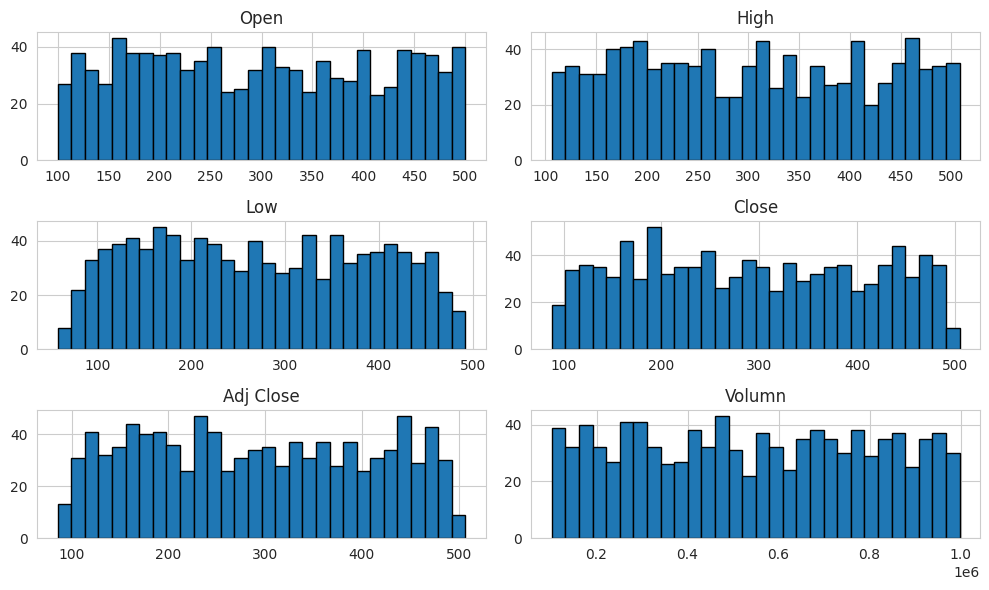

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
df.hist(figsize=(10,6) , bins = 30, edgecolor = "black")
plt.tight_layout()
plt.show()

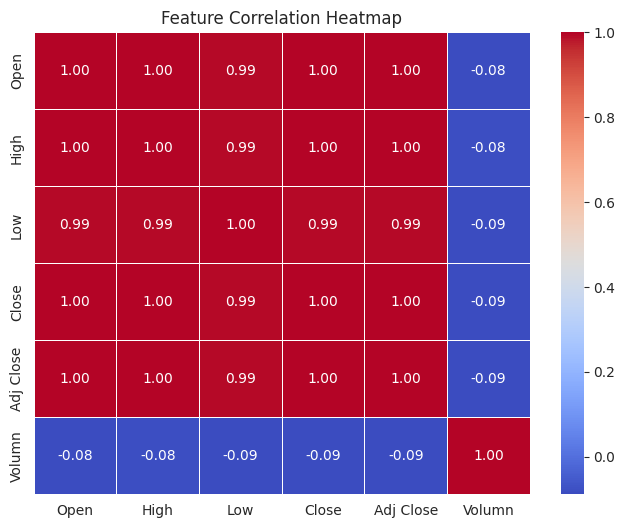

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns='Date:').corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

x = df[["Open", "High", "Low","Close","Adj Close","Volumn"]]
y = df["Close"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

# Train Linear Regression Model
model = LinearRegression()
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# Model Performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel performance:\nMAE:{mae:.2f},R2 score:{r2:.2f}")


Model performance:
MAE:0.00,R2 score:1.00


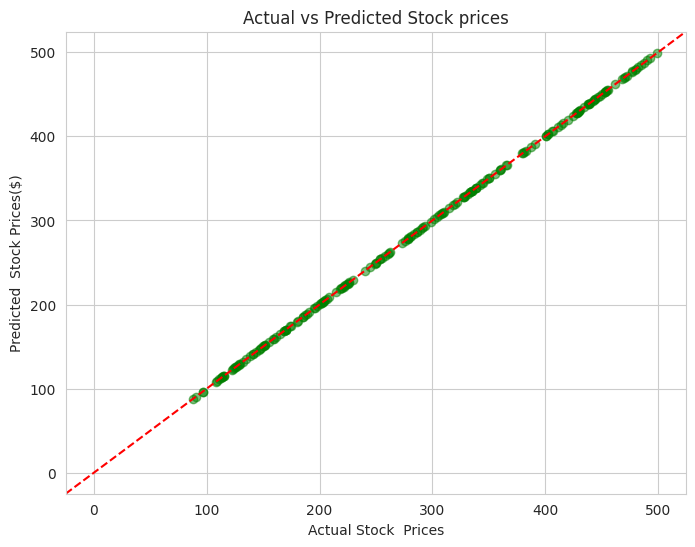

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.5,color = "green")
plt.xlabel("Actual Stock  Prices")
plt.ylabel("Predicted  Stock Prices($)")
plt.title("Actual vs Predicted Stock prices")
plt.axline([0,0], slope = 1,color = "red",linestyle ="--")
plt.show()